# 6. Decision Trees and Ensemble Learning
## 6.1 Credit risk scoring project
* Dataset: https://github.com/gastonstat/CreditScoring
  

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## 6.2 Data cleaning and preparation
* Downloading the dataset
* Re-encoding the categorical variables
* Doing the train/validation/test split

In [3]:
# data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv'
# !wget $data

In [4]:
df = pd.read_csv("CreditScoring.csv")
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [5]:
df.columns = df.columns.str.lower()
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [6]:
# Decode categorical variables back to strings

# Default as in - didn't return loan
status_values = {
    1:"ok",
    2: "default",
    0: "unk",
}
df.status = df.status.map(status_values)
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [7]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [8]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [9]:
for col in ['income', 'assets', 'debt']:
    df[col] = df[col].replace(to_replace=99999999, value=np.nan)

In [10]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [11]:
# not clear what to do with the 1 entry with the "unk" value, so filtering it out and resetting indexes
df = df[df.status != "unk"].reset_index(drop=True)

In [12]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df, test_size=0.25, random_state=11)



In [13]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


In [14]:
y_train = (df_train.status == "default").astype(int).values
y_val = (df_val.status == "default").astype(int).values
y_test = (df_test.status == "default").astype(int).values


In [15]:
del df_train["status"]
del df_val["status"]
del df_test["status"] 

## 6.3 Decision trees

* How a decision tree looks like
* Training a decision tree 
* Overfitting
* Controlling the size of a tree

In [16]:
def assess_risk(client):
    if client["records"] == "yes":
        if client["job"] == "partime":
            return "default"
        else:
            return "ok"
    else:
        if client["assets"] > 6000:
            return "ok"
        else:
            return "default"

In [17]:
xi = df_train.iloc[0].to_dict()
xi

{'seniority': 1,
 'home': 'rent',
 'time': 36,
 'age': 24,
 'marital': 'married',
 'records': 'no',
 'job': 'partime',
 'expenses': 41,
 'income': 56.0,
 'assets': 0.0,
 'debt': 0.0,
 'amount': 500,
 'price': 585}

In [18]:
assess_risk(xi)

'default'

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [20]:
train_dicts = df_train.fillna(0).to_dict(orient="records")
train_dicts[0]

{'seniority': 1,
 'home': 'rent',
 'time': 36,
 'age': 24,
 'marital': 'married',
 'records': 'no',
 'job': 'partime',
 'expenses': 41,
 'income': 56.0,
 'assets': 0.0,
 'debt': 0.0,
 'amount': 500,
 'price': 585}

In [21]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [22]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:
val_dicts = df_val.fillna(0).to_dict(orient="records")
X_val = dv.transform(val_dicts)

In [24]:
y_pred = dt.predict_proba(X_val)[:, 1]

In [25]:
roc_auc_score(y_val, y_pred)

0.6640994213385818

In [26]:
# Overfiting 100% on traning datasert but 66% on validation dataset

###

# Overfitting - memorizing the data but failing to generalize
# Issue if we let the decision tree to grow too deep
# One way - restrict the depth of the decision tree. Then model learns less specific rules.
####
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

In [27]:
### Retrain the tree, but control the depth

dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

val_dicts = df_val.fillna(0).to_dict(orient="records")
X_val = dv.transform(val_dicts)

y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.6624278637454675

In [28]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

### ^^^ With 3 levels deep tree - validation is 73% and traingni dataset predictions at 76%


0.6972613817060012

In [29]:
# Decision "stump" - Decision tree with depth=1. Only one condition it decides on.

In [30]:
# Visualize the decision tree

from sklearn.tree import export_text
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- class: 0
|--- records=no >  0.50
|   |--- job=partime <= 0.50
|   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- class: 1



## 6.4 Decision tree learning algorithm

* Finding the best split for one column
* Finding the best split for the entire dataset
* Stopping criteria
* Decision tree learning algorithm
  * Find the best split
  * Stop if max_depth is reached
  * If LEFT is sufficiently large AND not pure
    * -> repeat for LEFT
  * If RIGHT is sufficiently large AND not pure
    * -> repeat for RIGHT

In [31]:
# Decision node - a "leaf"

In [32]:
# Example how decision tree algorithm learns on a simple dataset of assets and status
data = [
    [8000, 'default'],
    [2000, 'default'],
    [   0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000, 'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'status'])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [33]:
df_example.sort_values('assets')

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


In [34]:
Ts = [0, 2000, 3000, 4000, 5000, 8000]

In [35]:
from IPython.display import display

for T in Ts:
    # T = 4000
    df_left = df_example[df_example.assets <= T]  # One leaf
    df_right = df_example[df_example.assets > T]  # THe other leaf
    

    print(T)
    display(df_left)
    print(df_left.status.value_counts(normalize=True))
    display(df_right)
    print(df_right.status.value_counts(normalize=True))
    print()


# Which split is best?
# T = 3000, because ACG impurity  - 10% (impurity (left + impurity right)/2)
# - Misclassification rate for each side  - Impurity - we want our leaves to be as pure as possible.
# Misclassification rate shows us how impure the leaves are

0


,assets,status
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

2000


,assets,status
1,2000,default
2,0,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

3000


,assets,status
1,2000,default
2,0,default
7,3000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,status
0,8000,default
6,9000,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,status
6,9000,ok


status
ok    1.0
Name: proportion, dtype: float64



In [36]:
# Calc this for 2 features

data = [
    [8000, 3000, 'default'],
    [2000, 1000, 'default'],
    [   0, 1000, 'default'],
    [5000, 1000, 'ok'],
    [5000, 1000, 'ok'],
    [4000, 1000, 'ok'],
    [9000,  500, 'ok'],
    [3000, 2000, 'default'],
]

df_example = pd.DataFrame(data, columns=['assets', 'debt', 'status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


In [37]:
df_example.sort_values("debt")

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default
0,8000,3000,default


In [38]:
thresholds = {
    'assets': [0, 2000, 3000, 4000, 5000, 8000],
    'debt': [500, 1000, 2000]
}


In [39]:
for feature, Ts in thresholds.items():
    print('#####################')
    print(feature)
    for T in Ts:
        print(T)
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature] > T]

        display(df_left)
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print(df_right.status.value_counts(normalize=True))

        print()
    print('#####################')

#####################
assets
0


,assets,debt,status
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64

3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.8
default    0.2
Name: proportion, dtype: float64

4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,2000,default


status
default    0.75
ok         0.25
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


status
ok         0.75
default    0.25
Name: proportion, dtype: float64

5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.5
ok         0.5
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


status
default    0.5
ok         0.5
Name: proportion, dtype: float64

8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64

#####################
#####################
debt
500


,assets,debt,status
6,9000,500,ok


status
ok    1.0
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,2000,default


status
default    0.571429
ok         0.428571
Name: proportion, dtype: float64

1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


status
ok         0.666667
default    0.333333
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default
7,3000,2000,default


status
default    1.0
Name: proportion, dtype: float64

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,2000,default


status
ok         0.571429
default    0.428571
Name: proportion, dtype: float64


,assets,debt,status
0,8000,3000,default


status
default    1.0
Name: proportion, dtype: float64

#####################


^^ Assets still on AVG better at mkaing the split - best split at ASSETS > 3000

### Finding the right split

- For f in features:
- Find all thresholds for `F`
- For `T` in thresholds:
- Split dataset using `F > T` condition
- Compute the impurity of the split

Select condition with the lowest impurity

### Stopping criteria 
- We recursively apply this splitting but how do we determine when to stop?
  - Group is already pure (doesn' t make sense to split this group)\
  - Tree reached depth limit
  - Group is too small to split (need to provide the minimum size of the group)


## 6.5 Decision trees parameter tuning

* selecting `max_depth`
* selecting `min_samples_leaf`

In [40]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]
for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)


    print(f"{str(depth):4} -> {auc:.3f}")
    # best depth  - 4/5/6
    # if only one should be selected, then should go with 4 - as it' s a simpler tree,
    # easier to read and understand

1    -> 0.601
2    -> 0.662
3    -> 0.740
4    -> 0.781
5    -> 0.782
6    -> 0.779
10   -> 0.685
15   -> 0.647
20   -> 0.658
None -> 0.657


In [41]:
scores = []

for depth in [4, 5, 6, 7, 10, 15, 20, None]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

In [42]:
columns = ["max_depth", "min_samples_leaf", "auc"]
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,min_samples_leaf,auc
0,4.0,1,0.781256
1,4.0,5,0.779091
2,4.0,10,0.778942
3,4.0,15,0.780627
4,4.0,20,0.775748


In [43]:
df_scores.sort_values(by="auc", ascending=False).head(n=15)

,max_depth,min_samples_leaf,auc
30,7.0,100,0.792147
62,NaN,100,0.791389
54,20.0,100,0.791389
46,15.0,100,0.791389
38,10.0,100,0.791389
22,6.0,100,0.787720
28,7.0,20,0.786404
10,5.0,10,0.784835
9,5.0,5,0.783130
15,5.0,200,0.783112


In [44]:
# ^^^ Best is max_depth = 7.0	and min_samples_leaf = 100 , auc = 0.792147
df_scores_pivot = df_scores.pivot(index="min_samples_leaf", columns=["max_depth"], values=["auc"])
df_scores_pivot.round(3)

auc                                                 
max_depth           NaN   4.0    5.0    6.0    7.0    10.0   15.0   20.0
min_samples_leaf                                                        
1                 0.665  0.781  0.782  0.778  0.754  0.677  0.649  0.645
5                 0.709  0.779  0.783  0.779  0.770  0.722  0.722  0.712
10                0.754  0.779  0.785  0.776  0.774  0.752  0.760  0.755
15                0.775  0.781  0.782  0.778  0.777  0.765  0.772  0.769
20                0.777  0.776  0.783  0.779  0.786  0.782  0.783  0.783
100               0.791  0.770  0.779  0.788  0.792  0.791  0.791  0.791
200               0.783  0.770  0.783  0.783  0.783  0.783  0.783  0.783
500               0.729  0.729  0.729  0.729  0.729  0.729  0.729  0.729

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

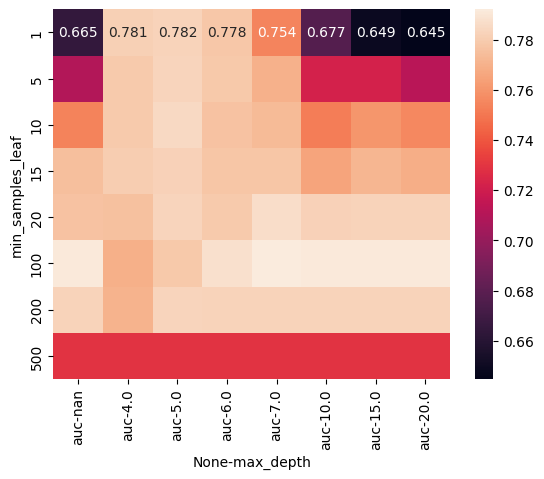

In [45]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [46]:
dt = DecisionTreeClassifier(max_depth=7, min_samples_leaf=100)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=100)

## 6.6 Ensembles and random forest

* Board of experts
  * One decision tree = one expert
  * Why "Random" forest? -> Each decision tree gets random features to train on
* Ensembling models 
* Random forest - ensembling decision trees
* Tuning random forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
# n_estimators = number of decision trees to train on 
rf = RandomForestClassifier(n_estimators=10, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [49]:
y_pred = rf.predict_proba(X_val)[:, 1]

In [50]:
# Without any additional tuning (except limiting n_estimators to 10), 
# already as good of a result s with the best decision tree we had
roc_auc_score(y_val, y_pred)

0.7889594701299926

In [51]:
scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

In [52]:
df_scores = pd.DataFrame(scores, columns=["n_estimators", "auc"])

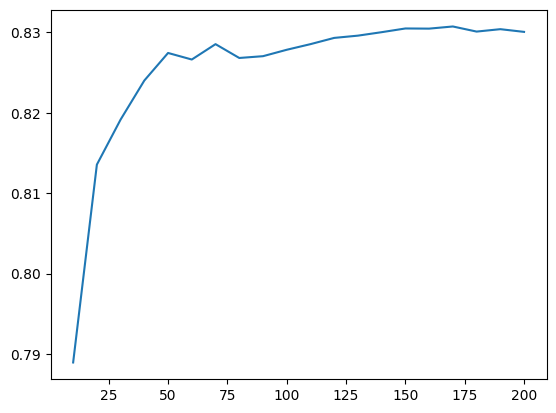

In [53]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [54]:
# We have determined that mmost growth happens with ~50 n_estimators,
# after that growth  somewhat stagnates

# Now we need to tune the decision tree parameters (max_depth, min_samples_leaf)

In [55]:
# Train RandomForest model with different max_depth parameters
scores = []
for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((d, n, auc))

In [56]:
df_scores = pd.DataFrame(scores, columns=["max_depth", "n_estimators", "auc"])
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.819097
1,5,20,0.822416
2,5,30,0.826779
3,5,40,0.824382
4,5,50,0.825887


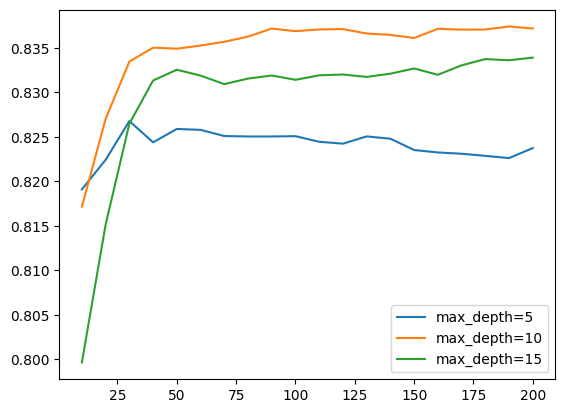

In [59]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.auc, label=f"max_depth={d}")
    plt.legend()


In [61]:
# max_depth=10 seems to be the best one
best_max_depth = 10

In [62]:
# Train RandomForest model with different min_samples_leaf parameters
scores = []
for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(
            n_estimators=n,
            max_depth=best_max_depth,
            min_samples_leaf=s,
            random_state=1,
        )
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((s, n, auc))

In [63]:
df_scores = pd.DataFrame(scores, columns=["min_samples_leaf", "n_estimators", "auc"])
df_scores.head()

,min_samples_leaf,n_estimators,auc
0,1,10,0.817146
1,1,20,0.827022
2,1,30,0.833461
3,1,40,0.835032
4,1,50,0.834915


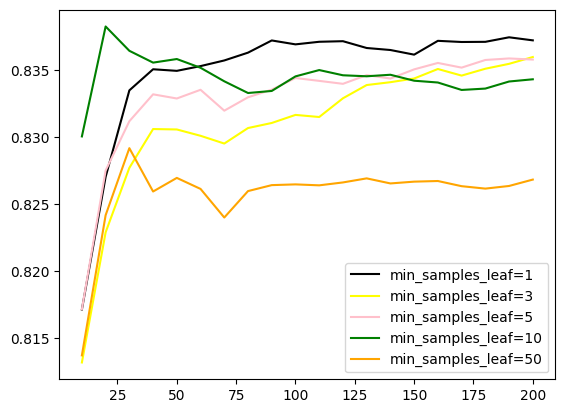

In [66]:
colors = ["black", "yellow", "pink", "green", "orange"]
min_samples_leaf_vals = [1, 3, 5, 10, 50]
for s, color in zip(min_samples_leaf_vals, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    plt.plot(
        df_subset.n_estimators,
        df_subset.auc,
        label=f"min_samples_leaf={s}",
        color=color,
    )
    plt.legend()


In [69]:
# Choosing min_samples_leaf as best - 10, only because it has best
# performance until 50 n_estimators. After that - would select 1 as min_samples_leaf
best_min_samples_leaf = 10

In [71]:
# looks liek max_depth and min_samples leaf best perform at n_estimators = 50
best_n_estimators = 50

In [72]:
rf = RandomForestClassifier(
    n_estimators=best_n_estimators,
    max_depth=best_max_depth,
    min_samples_leaf=best_min_samples_leaf,
    random_state=1,
)
rf.fit(X_train, y_train)

y_pred = rf.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)

In [73]:
auc
# 0.8357

0.8357945103770139

Other parameters can try:
- n_jobs
- bootstrap
- max_features